In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
from pandas.plotting import scatter_matrix
from scipy import stats

In [2]:
car_prices_df = pd.read_csv("car_prices.csv")
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
df = car_prices_df.copy()
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [5]:
#fill with 'Other' category
df['make'].fillna('Other', inplace=True)
df['model'].fillna('Other', inplace=True)
df['trim'].fillna('Other', inplace=True)
df['color'].fillna('Other', inplace=True)

In [6]:
#fill with 'Mode'
df['body'].fillna(df.body.mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['interior'].fillna(df['interior'].mode()[0], inplace=True)

In [7]:
#remove null values
df.dropna(subset=['vin'], inplace=True)
df.dropna(subset=['saledate'], inplace=True)

In [8]:
df.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11816
odometer           94
color               0
interior            0
seller              0
mmr                22
sellingprice        0
saledate            0
dtype: int64

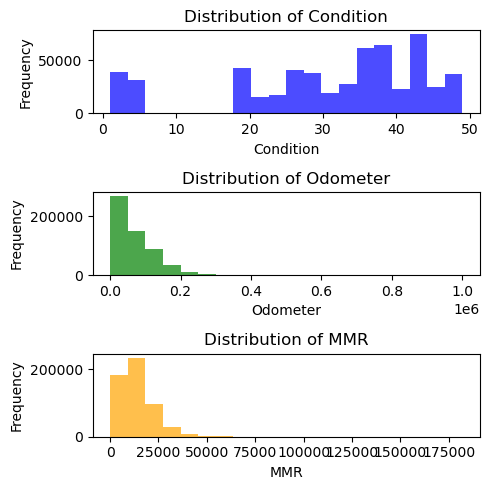

In [39]:
plt.figure(figsize=(5, 5))

# Plot histogram for 'condition'
plt.subplot(3, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')

# Plot histogram for 'odometer'
plt.subplot(3, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

# Plot histogram for 'mmr'
plt.subplot(3, 1, 3)
plt.hist(df['mmr'].dropna(), bins=20, color='orange', alpha=0.7)
plt.title('Distribution of MMR')
plt.xlabel('MMR')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)

In [11]:
#All Missing Values Accounted For
df.isnull().sum() 

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [12]:
#No Duplicates to worry about

duplicate_rows = df[df.duplicated()]
duplicate_rows.sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
vin               0
state             0
condition       0.0
odometer        0.0
color             0
interior          0
seller            0
mmr             0.0
sellingprice    0.0
saledate          0
dtype: object

In [13]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558821.000000,558821.000000,558821.000000,558821.000000,558821.000000
mean,2010.038828,30.764059,68321.141250,13769.377495,13611.358176
std,3.966874,13.275023,53394.310676,9679.776628,9749.536466
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28375.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52268.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99104.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


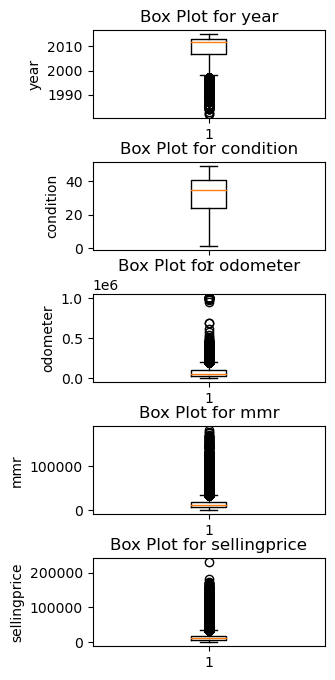

In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(3, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()


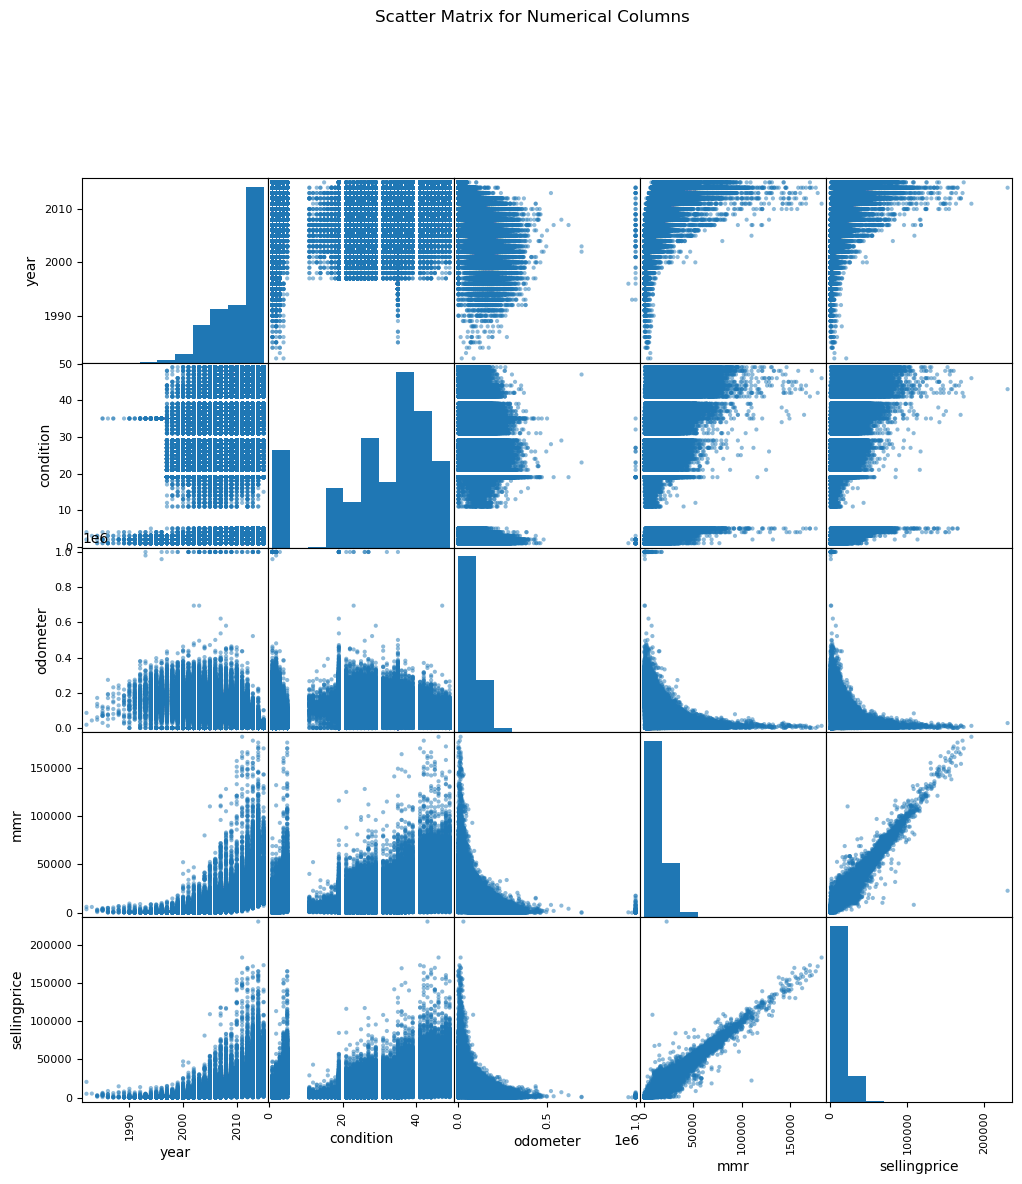

In [15]:
scatter_matrix(df[numerical_columns], alpha=0.5, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix for Numerical Columns', y=1.02)
plt.show()

In [16]:
# Remove outliers using Z-score
z_scores = stats.zscore(df[numerical_columns])
clean_df = df[(z_scores < 2).all(axis=1)]
clean_df.shape

(511816, 16)

In [17]:
clean_df.describe()

,year,condition,odometer,mmr,sellingprice
count,511816.000000,511816.000000,511816.000000,511816.000000,511816.000000
mean,2010.237798,31.030118,63351.716578,13029.954811,12861.592033
std,3.704200,13.043716,43007.915008,7230.515564,7331.708638
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,25.000000,28792.000000,7675.000000,7400.000000
50%,2012.000000,35.000000,51633.000000,12300.000000,12100.000000
75%,2013.000000,41.000000,94396.500000,17650.000000,17600.000000
max,2015.000000,49.000000,175107.000000,33100.000000,33100.000000


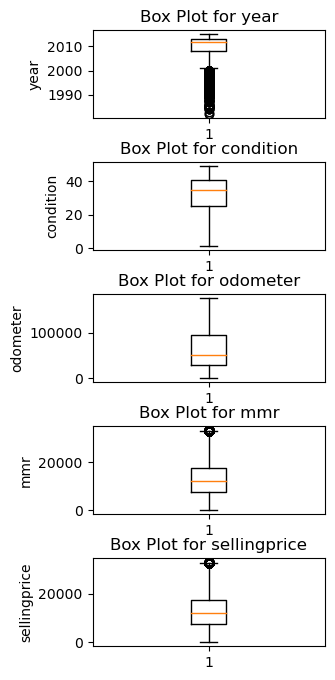

In [18]:
numerical_columns = clean_df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(3, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(clean_df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

In [19]:
#we are dropping the saledate column because we face error inside this column. And its not going to help us in analysis. in Timeseries analysis it can help but we are not doing time series analysis on this data.
clean_df.drop(columns=['saledate'], inplace=True)

C:\Users\coult\AppData\Local\Temp\ipykernel_39488\417278354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(columns=['saledate'], inplace=True)


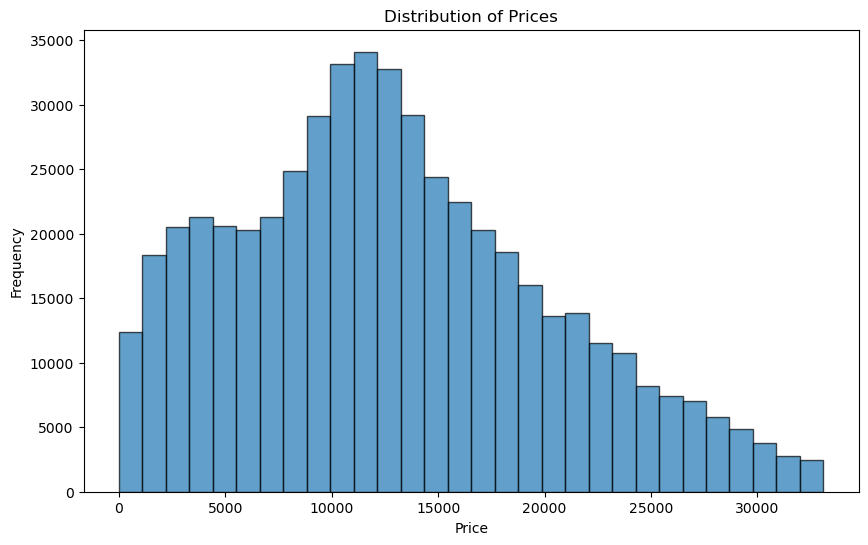

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(clean_df['sellingprice'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

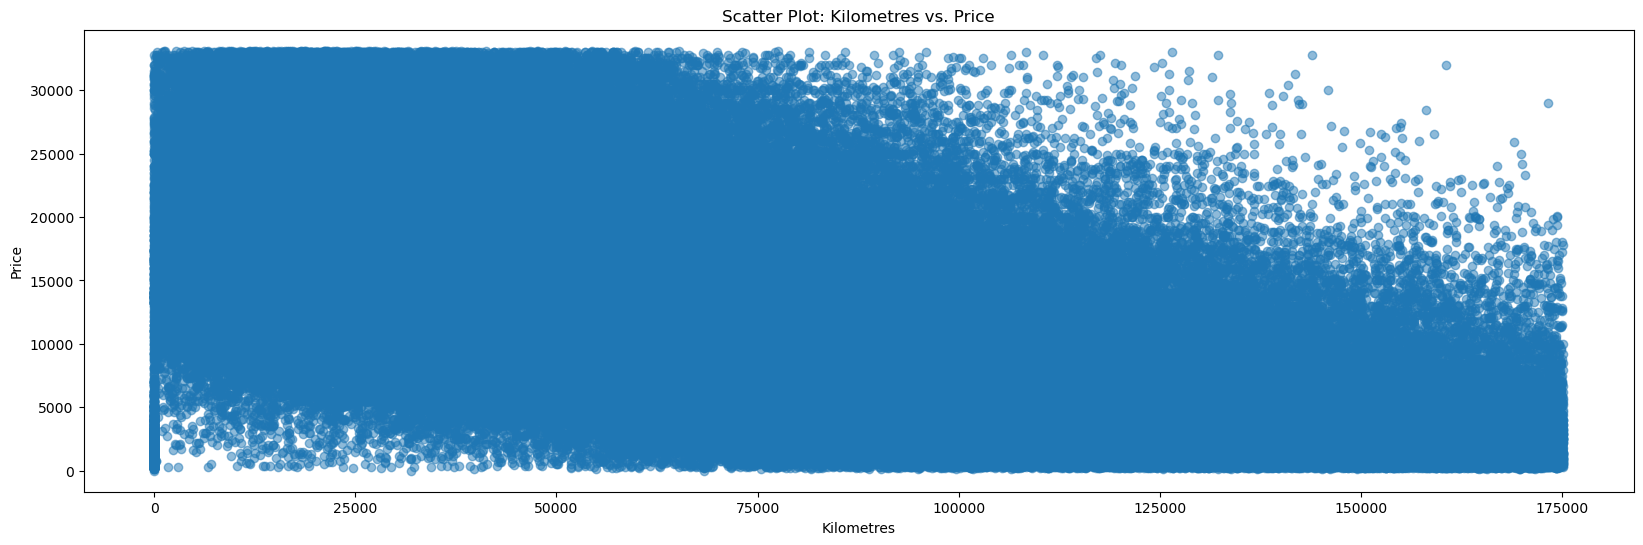

In [21]:
plt.figure(figsize=(20, 6))
plt.scatter(clean_df['odometer'], clean_df['sellingprice'], alpha=0.5)
plt.title('Scatter Plot: Kilometres vs. Price')
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.show()

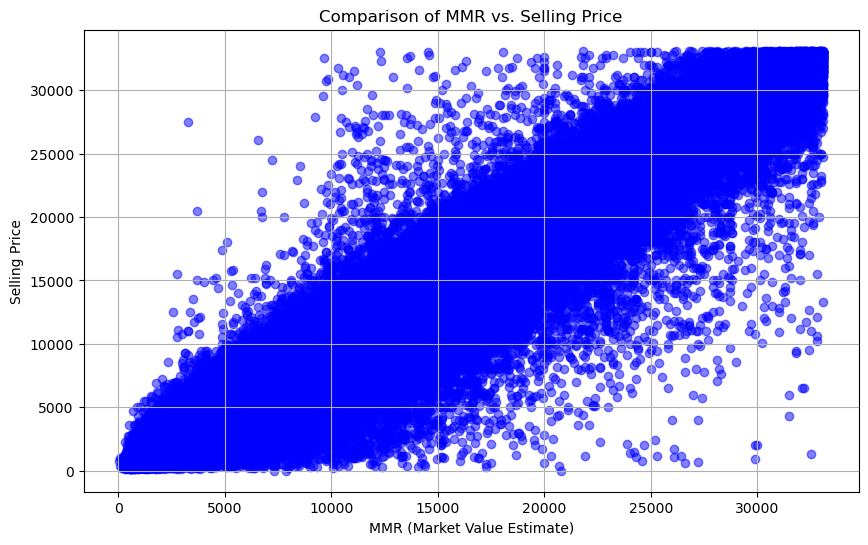

In [40]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['mmr'], clean_df['sellingprice'], alpha=0.5, color='b')

# Add labels and title
plt.title('Comparison of MMR vs. Selling Price')
plt.xlabel('MMR (Market Value Estimate)')
plt.ylabel('Selling Price')

# Show plot
plt.grid(True)
plt.show()

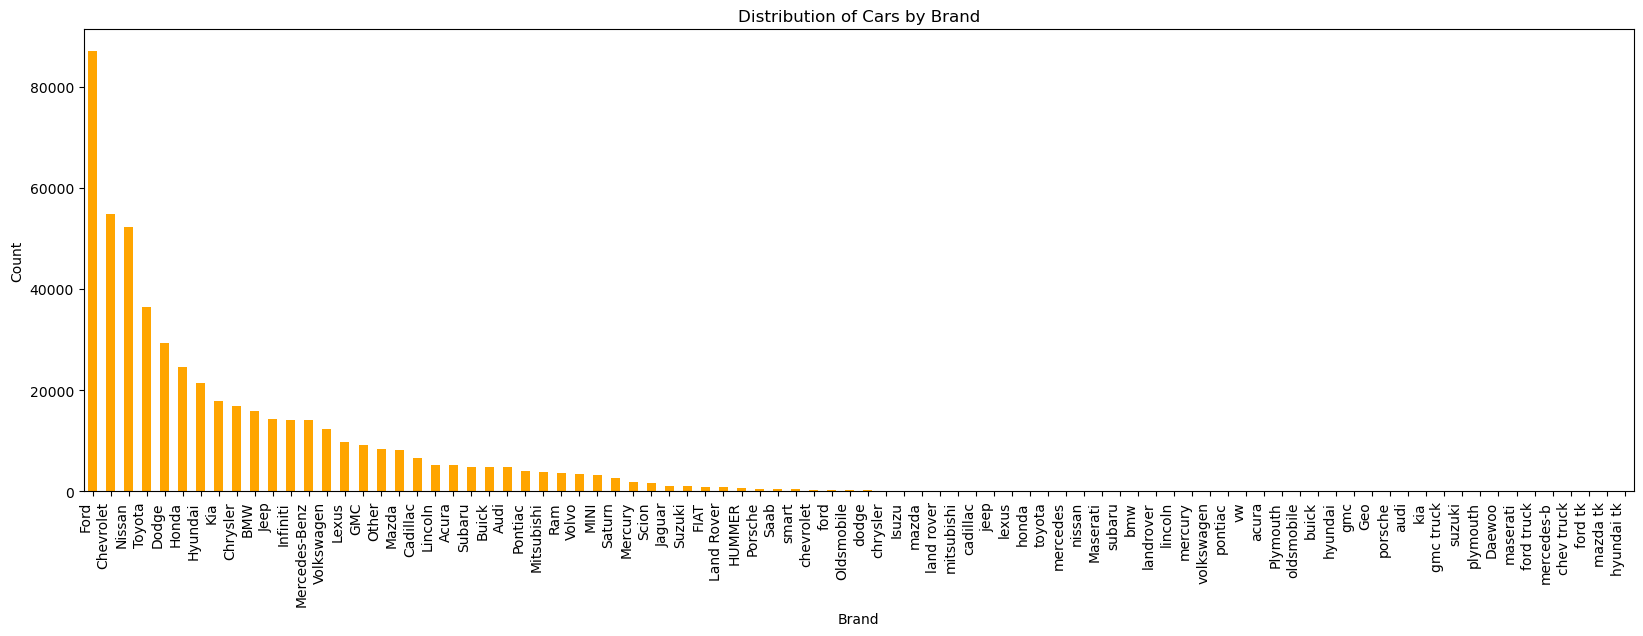

In [22]:
plt.figure(figsize=(20, 6))

clean_df['make'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

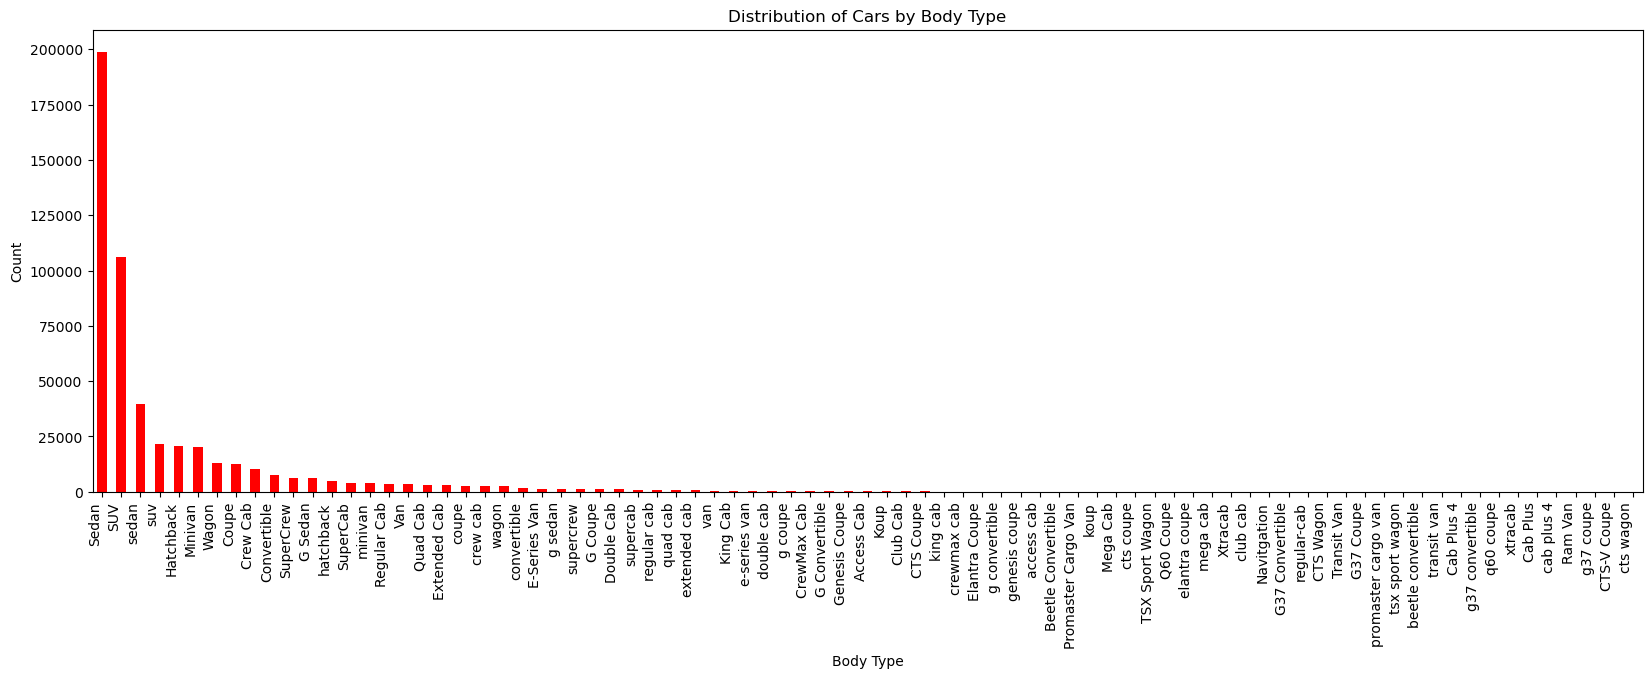

In [23]:
plt.figure(figsize=(20, 6))
clean_df['body'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Cars by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

In [24]:
#Correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

numerical_columns.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.323579,-0.772497,0.596613,0.586484
condition,0.323579,1.000000,-0.304593,0.273155,0.313121
odometer,-0.772497,-0.304593,1.000000,-0.588025,-0.582327
mmr,0.596613,0.273155,-0.588025,1.000000,0.983635
sellingprice,0.586484,0.313121,-0.582327,0.983635,1.000000


In [25]:
# Normalize/Scalling function. it will return scale dataframe.
def normalize(df):
    # Nominal categories
    for name in features_nom:
        df[name] = df[name].astype("category")
        # Add a None category for missing values
        if "None" not in df[name].cat.categories:
            df[name] = df[name].cat.add_categories("None")
    # Ordinal categories
    for name, levels in ordered_levels.items():
        df[name] = df[name].astype(CategoricalDtype(levels,
                                                    ordered=True))
    return df

In [26]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def normalize_features(df):
    # Copy the original DataFrame to avoid modifying the input
    normalized_df = df.copy()

    # Numerical columns to be normalized
    numerical_cols = ['year', 'condition', 'odometer', 'mmr']

    # Categorical columns to be encoded
    categorical_cols = [col for col in df.columns if col not in numerical_cols]

    # Normalize numerical features using Min-Max Scaling
    scaler_dict = {}
    for col in numerical_cols:
        scaler = MinMaxScaler()
        normalized_df[col] = scaler.fit_transform(df[[col]])
        scaler_dict[col] = scaler

    # Encode categorical features using Label Encoding
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        normalized_df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Encode the target column
    target_col = 'sellingprice'
    if target_col in df.columns:
        normalized_df[target_col] = label_encoders[target_col].transform(df[target_col])
        label_encoders[target_col] = le  # Add the target encoder to the dictionary

    return normalized_df, scaler_dict, label_encoders

In [27]:
normalized_df, scaler_dict, label_encoders = normalize_features(clean_df)

In [28]:
normalized_df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,1.000000,20,600,906,33,1,373764,25,0.083333,0.095017,40,1,6787,0.619048,797
1,1.000000,20,600,906,33,1,373756,25,0.083333,0.053636,40,0,6787,0.628118,797
2,0.969697,2,8,273,34,1,467824,25,0.916667,0.007595,30,1,4691,0.963719,1057
3,1.000000,44,544,1277,34,1,500605,25,0.833333,0.081556,40,1,12992,0.830688,995
5,1.000000,30,68,116,34,1,175740,25,0.000000,0.031712,30,1,4345,0.463341,408


In [29]:
scaler_dict

{'year': MinMaxScaler(),
 'condition': MinMaxScaler(),
 'odometer': MinMaxScaler(),
 'mmr': MinMaxScaler()}

In [30]:
label_encoders

{'make': LabelEncoder(),
 'model': LabelEncoder(),
 'trim': LabelEncoder(),
 'body': LabelEncoder(),
 'transmission': LabelEncoder(),
 'vin': LabelEncoder(),
 'state': LabelEncoder(),
 'color': LabelEncoder(),
 'interior': LabelEncoder(),
 'seller': LabelEncoder(),
 'sellingprice': LabelEncoder()}

In [31]:
from sklearn.model_selection import train_test_split

X_for_randomForest = normalized_df.drop(['sellingprice', 'year', 'vin', 'seller', 'state'], axis=1)  # Features
y_for_randomForest = normalized_df['sellingprice']  # Target variable

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_for_randomForest, y_for_randomForest, test_size=0.2, random_state=42)

# Further split the training data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (327561, 10) (327561,)
Validation set: (81891, 10) (81891,)
Test set: (102364, 10) (102364,)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Random Forest hyperparameter tuning using GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [30, 40, 50],
    'min_samples_split': [8, 12],
    'min_samples_leaf': [4, 5]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [30, 40, 50], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [33]:
rf_grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [34]:
# Get the best parameters and fit the model
best_rf_params = rf_grid_search.best_params_
best_rf_model = RandomForestRegressor(**best_rf_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=12)

In [35]:
from sklearn.metrics import mean_squared_error

y_val_pred_rf = best_rf_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f'Random Forest Validation Mean Squared Error: {mse_rf}')

Random Forest Validation Mean Squared Error: 2489.6345414370417


In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming X_test and y_test are your test data
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model's performance on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Mean Squared Error (MSE) on Test Data:", mse_test)
print("R-squared (R2) on Test Data:", r2_test)
print("Mean Absolute Error (MAE) on Test Data:", mae_test)

Mean Squared Error (MSE) on Test Data: 2406.910314379807
R-squared (R2) on Test Data: 0.9663106650596842
Mean Absolute Error (MAE) on Test Data: 32.96322837764639


In [37]:
import joblib

# Assuming best_rf_model is your trained Random Forest model
model_filename = 'random_forest_model0.97.pkl'
joblib.dump(best_rf_model, model_filename)

['random_forest_model0.97.pkl']

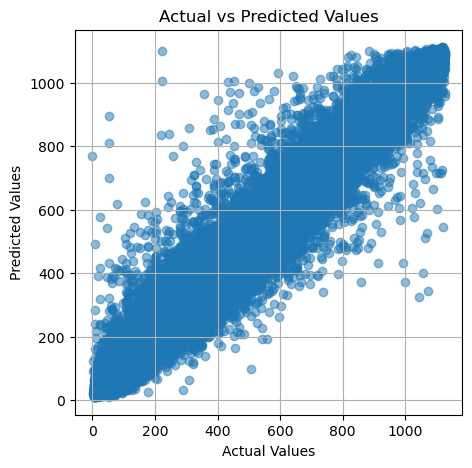

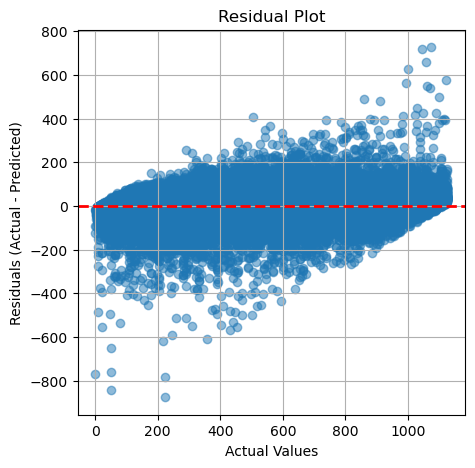

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for actual vs predicted values
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(5, 5))

plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()